In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split

sys.path.append("../library")
import RecSys as rs
import specifyLibrary as sl
path = "../clean_data/"

In [2]:
chefmozGeo_r = pd.read_csv(path + "chefmozGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
chefmozProfile_r = pd.read_csv(path + "chefmozProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
rating_final_r = pd.read_csv(path + "rating_final_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userChefmozRelation_r = pd.read_csv(path + "userChefmozRelation_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userGeo_r = pd.read_csv(path + "userGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userProfile_r = pd.read_csv(path + "userProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)

In [3]:
train, test = train_test_split(rating_final_r, test_size=0.2)

# Most Popular Restaurant

## Most visited Restaurant

In [4]:
train.shape

(698, 5)

In [5]:
train.head()

,userID,placeID,rating,food_rating,service_rating
33,23,66,0,0,0
471,37,30,1,1,2
766,6,1,1,1,1
54,26,89,2,2,2
550,78,27,2,1,2


In [6]:
mostVisited = train.groupby('placeID')['userID'].count()

In [7]:
train.head()

,userID,placeID,rating,food_rating,service_rating
33,23,66,0,0,0
471,37,30,1,1,2
766,6,1,1,1,1
54,26,89,2,2,2
550,78,27,2,1,2


In [8]:
mostVisited.sort_values(ascending=False).head(10)

placeID
1     30
87    30
85    26
41    20
18    18
35    18
52    17
25    16
82    15
77    14
Name: userID, dtype: int64

In [9]:
mostVisitedRestaurant = list(mostVisited.sort_values(ascending=False).index)

## Most Rated Restaurant

In [10]:
train.groupby('placeID')['rating'].count().head()

placeID
0     3
1    30
2     9
3     4
4     5
Name: rating, dtype: int64

In [11]:
mostRated = train.groupby('placeID')['rating'].sum()

In [12]:
mostRated.sort_values(ascending=False).head(10)

placeID
87    39
1     38
85    32
41    26
22    21
15    21
35    21
18    21
23    19
82    18
Name: rating, dtype: int64

In [13]:
mostRatedRestaurant = list(mostRated.sort_values(ascending=False).index)

## Highest mean rating Restaurant

In [14]:
train.groupby('placeID')['rating'].count().sort_values(ascending=False).head(10)

placeID
1     30
87    30
85    26
41    20
18    18
35    18
52    17
25    16
82    15
77    14
Name: rating, dtype: int64

In [15]:
train.groupby('placeID')['rating'].count().sort_values(ascending=True).head(10)

placeID
38    2
49    2
55    2
56    2
0     3
37    3
48    3
50    3
57    3
59    3
Name: rating, dtype: int64

In [16]:
def filteredListRatedRestaurant(train, min_ratings=0):
    listRatedRestaurant = train.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [17]:
filteredListRatedRestaurant(train).head(10)

,placeID,rating,mean
32,32,"[2, 2, 2, 2]",2.000000
34,34,"[2, 2, 2]",2.000000
79,79,"[2, 2, 2, 2, 2, 2, 2]",2.000000
70,70,"[2, 2, 2, 2, 1]",1.800000
75,75,"[2, 1, 2, 2]",1.750000
65,65,"[2, 2, 2, 1]",1.750000
76,76,"[1, 2, 2, 2, 1, 2, 2]",1.714286
0,0,"[1, 2, 2]",1.666667
37,37,"[2, 2, 1]",1.666667
59,59,"[1, 2, 2]",1.666667


In [18]:
filteredListRatedRestaurant(train,5).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
79,79,"[2, 2, 2, 2, 2, 2, 2]",2.000000
70,70,"[2, 2, 2, 2, 1]",1.800000
76,76,"[1, 2, 2, 2, 1, 2, 2]",1.714286
33,33,"[2, 2, 2, 1, 0, 2, 2, 2]",1.625000
15,15,"[2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2]",1.615385
22,22,"[1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1]",1.615385
17,17,"[2, 1, 1, 2, 2]",1.600000
23,23,"[1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2]",1.583333
19,19,"[2, 1, 2, 0, 1, 2, 2, 2, 2]",1.555556
44,44,"[1, 2, 1, 1, 1, 2, 2, 2]",1.500000


In [19]:
filteredListRatedRestaurant(train,10).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
15,15,"[2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2]",1.615385
22,22,"[1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1]",1.615385
23,23,"[1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2]",1.583333
39,39,"[1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2]",1.416667
85,86,"[1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2]",1.363636
83,83,"[1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1]",1.363636
86,87,"[2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, ...",1.300000
29,29,"[1, 2, 0, 0, 2, 2, 1, 2, 1, 2]",1.300000
41,41,"[2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, ...",1.300000
1,1,"[1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, ...",1.266667


In [20]:
rating_final_r['rating'].max()

2

## Excluding bad Rate

In [21]:
def filteredListRatedRestaurantExcluding(train,excludingRate=0, min_ratings=0):
    trainExcluding = train[train['rating']>=excludingRate]
    listRatedRestaurant = trainExcluding.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [22]:
filteredListRatedRestaurantExcluding(train)

,placeID,rating,mean
32,32,"[2, 2, 2, 2]",2.000000
34,34,"[2, 2, 2]",2.000000
79,79,"[2, 2, 2, 2, 2, 2, 2]",2.000000
70,70,"[2, 2, 2, 2, 1]",1.800000
75,75,"[2, 1, 2, 2]",1.750000
65,65,"[2, 2, 2, 1]",1.750000
76,76,"[1, 2, 2, 2, 1, 2, 2]",1.714286
0,0,"[1, 2, 2]",1.666667
37,37,"[2, 2, 1]",1.666667
59,59,"[1, 2, 2]",1.666667


In [23]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
79,79,"[2, 2, 2, 2, 2, 2, 2]",2.000000
33,33,"[2, 2, 2, 1, 2, 2, 2]",1.857143
70,70,"[2, 2, 2, 2, 1]",1.800000
22,22,"[1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]",1.750000
15,15,"[2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2]",1.750000
19,19,"[2, 1, 2, 1, 2, 2, 2, 2]",1.750000
41,41,"[2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2]",1.733333
2,2,"[1, 2, 2, 2, 2, 2, 1]",1.714286
76,76,"[1, 2, 2, 2, 1, 2, 2]",1.714286
40,40,"[2, 2, 2, 2, 2, 1, 1]",1.714286


In [24]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
22,22,"[1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]",1.750000
15,15,"[2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2]",1.750000
41,41,"[2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2]",1.733333
27,27,"[2, 1, 1, 1, 1, 2, 2, 2, 2, 2]",1.600000
84,85,"[2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, ...",1.600000
1,1,"[1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, ...",1.583333
23,23,"[1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2]",1.583333
86,87,"[2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, ...",1.560000
39,39,"[1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2]",1.545455
25,25,"[2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2]",1.500000


## Metrics for recommender systems

In [25]:
def recall_at_n(N, test, recommended, train=None):
    """
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return the recall
    """
    if train is not None: # Remove items in train
        # Esta línea de abajo estaría mal!!! por qué? Respuesta: al usar "set", perdemos el orden en la recomendación
        # rec_true =  set(recommended)- set(train)
        
        # Correct implementation
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
        # Equivalent 1-line of code:
        # rec_true = [r for r in recommended if r not in train]
    else:
        rec_true = recommended    
    intersection = len(set(test) & set(rec_true[:N]))
    return intersection / float(np.minimum(N, len(test)))

In [26]:
seen = [135025,135028,135023,135021,135026]
recommended = [135021,135024]
print(recall_at_n(1, seen, recommended))
print(recall_at_n(2, seen, recommended))
print(recall_at_n(3, seen, recommended))
print(recall_at_n(5, seen, recommended))
print(recall_at_n(10, seen, recommended))

1.0
0.5
0.3333333333333333
0.2
0.2


# Now Merge Test and Train

In [27]:
trainPlaceList = train.groupby('userID')['placeID'].apply(list).reset_index()

In [28]:
testPlaceList = test.groupby('userID')['placeID'].apply(list).reset_index()

In [29]:
joined = pd.merge(trainPlaceList, testPlaceList, how='inner', on='userID', suffixes=('_train', '_test')).set_index('userID')

In [30]:
joined.head()

,placeID_train,placeID_test
userID,,
2,"[15, 41, 87, 33, 1, 2, 77]","[27, 31]"
3,"[1, 76, 70, 33, 39, 83, 25, 27]","[12, 15, 65]"
4,"[32, 2, 35, 85, 63]","[86, 26]"
6,"[1, 23, 76, 65, 25, 62, 6, 44, 54]",[26]
7,"[87, 62, 24, 22, 85, 9]",[82]


In [31]:
# calculate the recall of the mostRatedMovies recommendation, for each user:
joined.apply(lambda l: recall_at_n(N=15, test=l[1], recommended=mostRatedRestaurant[:], train=l[0]), axis=1).head()

userID
2    0.500000
3    0.333333
4    0.500000
6    0.000000
7    1.000000
dtype: float64

In [32]:
def apk(N, test, recommended, train=None):
    """
    Computes the average precision at N given recommendations.
    
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return The average precision at N over the test set
    """
    if train is not None: 
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
    else:
        rec_true = recommended    
    predicted = rec_true[:N] # top-k predictions
    
    score = 0.0 # This will store the numerator
    num_hits = 0.0 # This will store the sum of rel(i)

    for i,p in enumerate(predicted):
        if p in test and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits/(i+1.0)
    return score / min(len(test), N)

In [33]:
topN = 1
predictions = mostVisitedRestaurant[:]
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.08
map@10=0.09


In [34]:
topN = 1
predictions = mostRatedRestaurant
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.10
map@10=0.09


In [35]:
topN = 1
predictions = list(filteredListRatedRestaurant(train)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.02


In [36]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.03


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [37]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,10)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.05
map@10=0.05


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [38]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.03


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.03


In [40]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=2,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.02
map@10=0.05


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Co-occurrence Matrix¶

In [41]:
# create a dictionary of movies per user
restaurantPerUser = (train[train['rating']>1]
                 .groupby('userID')['placeID']
                 .apply(np.array)
                 .to_dict()
                 )

In [42]:
# calculate the number of items in train
n_items = len(chefmozGeo_r['placeID'].unique())
n_items

95

In [43]:
# co-ocurrance matrix will have shape=[n_items,n_items]
coMatrix = np.zeros((n_items, n_items)) # co-occurrence matrix
for user,restaurant in restaurantPerUser.items():
    for r in restaurant:
        coMatrix[r, restaurant] += 1

In [44]:
userProfile_r[userProfile_r['userID']==1][['Rcuisine_Type','dress_preference','need_Parking','Upayment_accepts']].values[0]

array(['North_American', 'informal', 'no', 'no'], dtype=object)

In [45]:
userProfile_r.loc(0)[2]

userID                           3
smoker                         yes
drink_level         social drinker
dress_preference            formal
ambience                    family
transport                   public
marital_status              single
hijos                  independent
religion                  Catholic
activity                   student
need_Parking                    no
Rcuisine_Type       South_American
Upayment_accepts                no
Name: 2, dtype: object

In [46]:
userCoMatrix = sl.userCoMatrix(1,userProfile_r,n_items,coMatrix)

../library/specifyLibrary.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if coMatix=='noMatrix':
../library/specifyLibrary.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  userInfo['Rcuisine_Type'] = userInfo['Rcuisine_Type'].map(lambda x: x.split(';'))


In [47]:
userCoMatrix

array([[ 4.,  2.,  2., ...,  2.,  2.,  4.],
       [ 2., 16.,  3., ...,  2.,  2.,  2.],
       [ 2.,  3.,  7., ...,  2.,  2.,  2.],
       ...,
       [ 2.,  2.,  2., ...,  5.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  3.,  2.],
       [ 4.,  2.,  2., ...,  2.,  2.,  5.]])

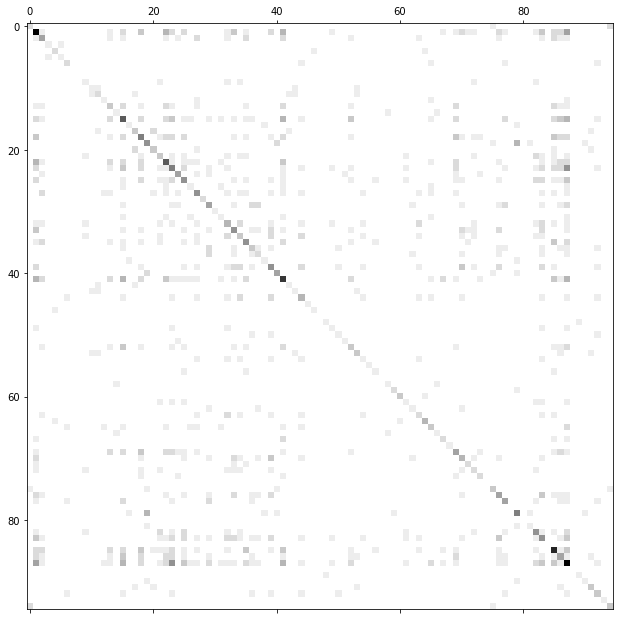

In [48]:
# visualize the matrix
plt.matshow(coMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

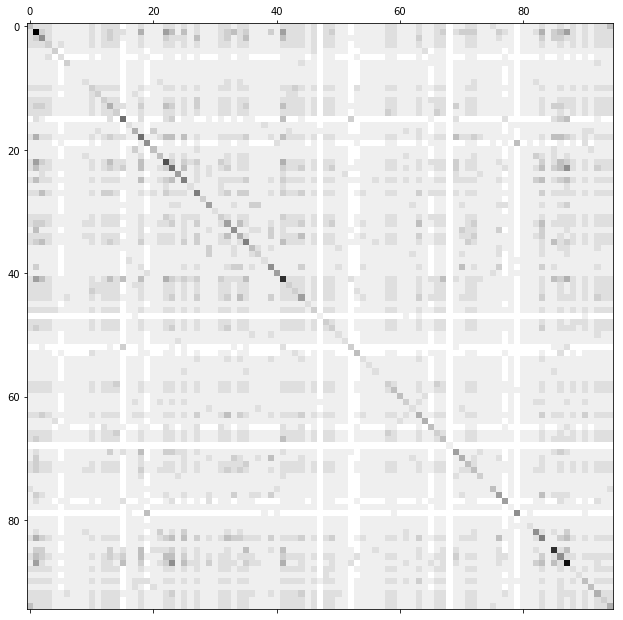

In [49]:
# visualize the matrix
plt.matshow(userCoMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

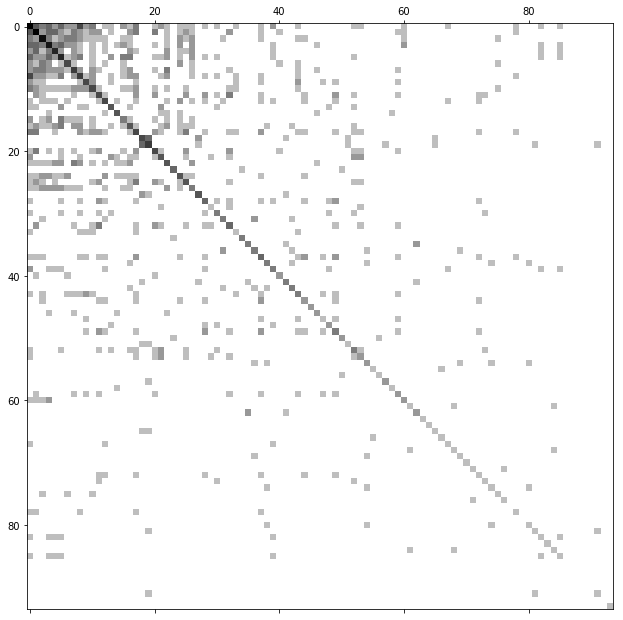

In [50]:
popular_indexing = mostRatedRestaurant
coMatrix_sorted = coMatrix[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

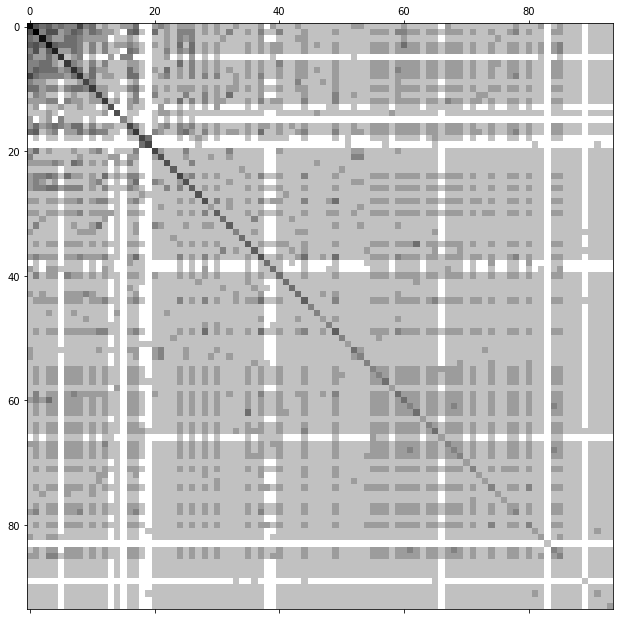

In [51]:
popular_indexing = mostRatedRestaurant
coMatrix_sorted = userCoMatrix[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [52]:
def co_occurrance_similarity(item_id, coocurrance, ntop=5):
    """
    Returns the top-N most similar items to a given one, based on the coocurrance matrix
    
    :param item_id: id of input item
    :param cooccurrance: 2-dim numpy array with the co-occurance matrix
    :param ntop: number of items to be retrieved
    
    :return top-N most similar items to the given item_id
    """
    similarItems = coocurrance[item_id, :]
    # return indeces of most similar items in descendign order
    mostSimilar = np.argsort(similarItems)[::-1]
    # remove the item itslef, maybe it's not the first element
    ##### mostSimilar = mostSimilar[1:ntop+1]
    mostSimilar = list(mostSimilar)
    mostSimilar.remove(item_id)
    mostSimilar = np.array(mostSimilar)[:ntop]
    
    # return a numpy array with the index (first column) and the value (second column) of the most similar items
    return np.stack((mostSimilar, similarItems[mostSimilar])).T

In [53]:
# First column are indices, while second one is the frequency of co-ocurrance
co_occurrance_similarity(1, userCoMatrix, 5)

array([[22.,  6.],
       [41.,  6.],
       [87.,  6.],
       [18.,  5.],
       [83.,  5.]])

In [54]:
co_occurrance_similarity(1, coMatrix, 5)

array([[87.,  5.],
       [41.,  4.],
       [22.,  4.],
       [33.,  3.],
       [18.,  3.]])

In [55]:
co_occurrance_similarity(1, coMatrix, 10)

array([[87.,  5.],
       [41.,  4.],
       [22.,  4.],
       [33.,  3.],
       [18.,  3.],
       [83.,  3.],
       [23.,  2.],
       [70.,  2.],
       [76.,  2.],
       [39.,  2.]])

In [56]:
co_occurrance_similarity(49, coMatrix, 5)

array([[ 1.,  1.],
       [87.,  1.],
       [83.,  1.],
       [23.,  1.],
       [32.,  1.]])

In [57]:
def co_occurrance_recommendation(items_id, cooccurrance, ntop=10):
    """
    Obtain the list of ntop recommendations based on a list of items (user history of views)
    
    :param items_id: list of items ids
    :param coocurrence: co-ocurrence matrix (numpy 2-dim array)
    :param ntop: top-K items to be retrieved
    
    :return list of ntop items recommended
    """
    # put together all the similar items and its value. For this, use np.vstack, wich stacks one array after 
    # another (row wise)
    list_sim_items = np.vstack([co_occurrance_similarity(id_, cooccurrance, ntop) for id_ in items_id])
    # Group by id and take the maximum frquency to remove duplicates
    largest_freq = pd.DataFrame(list_sim_items, columns=['id', 'freq']).groupby('id').agg(max).reset_index()
    
    # sort by value in descending order
    sorted_list = largest_freq.sort_values(by='freq', ascending=False)
    
    # get the top N
    out = sorted_list.values[:ntop, 0]
    return out

In [58]:
# get users in train with their movies
trainUsersGrouped = train[train['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
testUsersGrouped = test[test['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
trainUsersGrouped.head()

,userID,placeID
0,1,"[1, 22, 69]"
1,2,"[15, 41, 87, 33, 1, 2, 77]"
2,3,"[1, 76, 70, 33, 39, 83, 25]"
3,4,"[32, 2, 35, 85, 63]"
4,5,"[27, 85, 24, 18]"


In [59]:
co_occurrance_recommendation([69, 22, 1],coMatrix,5)

array([87.,  1., 22., 41., 18.])

In [60]:
co_occurrance_recommendation([69, 22, 1],userCoMatrix,5)

array([ 1., 22., 41., 87., 18.])

In [61]:
Ntop = 5
# Get the recommendations for all users using the apply method
predictions = trainUsersGrouped['placeID'].apply(lambda x: co_occurrance_recommendation(x, coMatrix, Ntop))
predictions.head()

0     [87.0, 1.0, 22.0, 41.0, 18.0]
1     [23.0, 1.0, 87.0, 22.0, 15.0]
2     [87.0, 22.0, 41.0, 1.0, 18.0]
3    [87.0, 35.0, 18.0, 85.0, 41.0]
4     [1.0, 18.0, 35.0, 41.0, 69.0]
Name: placeID, dtype: object

In [62]:
usersIDs = trainUsersGrouped['userID'].values
placeIDs = trainUsersGrouped['placeID'].values

In [63]:
Ntop = 5
predictions = sl.co_occurrance_recommendation_for_list_users(usersIDs,placeIDs,coMatrix,userProfile_r,n_items,Ntop)
predictions = pd.DataFrame({'predictions_userCoMatrix':predictions})
predictions.head()

../library/specifyLibrary.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if coMatix=='noMatrix':
../library/specifyLibrary.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  userInfo['Rcuisine_Type'] = userInfo['Rcuisine_Type'].map(lambda x: x.split(';'))


,predictions_userCoMatrix
0,"[1.0, 22.0, 41.0, 87.0, 18.0]"
1,"[23.0, 22.0, 1.0, 87.0, 83.0]"
2,"[22.0, 1.0, 41.0, 83.0, 87.0]"
3,"[21.0, 22.0, 23.0, 32.0, 34.0]"
4,"[1.0, 2.0, 18.0, 22.0, 23.0]"


In [64]:
topN = 5
# add a prediction column to train
trainUsersGrouped['prediction_coMatrix'] = trainUsersGrouped['placeID'].apply(
    lambda x: co_occurrance_recommendation(x, coMatrix, topN)
)
trainUsersGrouped['predictions_userCoMatrix'] = predictions['predictions_userCoMatrix']

In [65]:
trainUsersGrouped.head()

,userID,placeID,prediction_coMatrix,predictions_userCoMatrix
0,1,"[1, 22, 69]","[87.0, 1.0, 22.0, 41.0, 18.0]","[1.0, 22.0, 41.0, 87.0, 18.0]"
1,2,"[15, 41, 87, 33, 1, 2, 77]","[23.0, 1.0, 87.0, 22.0, 15.0]","[23.0, 22.0, 1.0, 87.0, 83.0]"
2,3,"[1, 76, 70, 33, 39, 83, 25]","[87.0, 22.0, 41.0, 1.0, 18.0]","[22.0, 1.0, 41.0, 83.0, 87.0]"
3,4,"[32, 2, 35, 85, 63]","[87.0, 35.0, 18.0, 85.0, 41.0]","[21.0, 22.0, 23.0, 32.0, 34.0]"
4,5,"[27, 85, 24, 18]","[1.0, 18.0, 35.0, 41.0, 69.0]","[1.0, 2.0, 18.0, 22.0, 23.0]"


In [66]:
joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))

In [67]:
joined.head()

,userID,placeID_train,prediction_coMatrix,predictions_userCoMatrix,placeID_test
0,2,"[15, 41, 87, 33, 1, 2, 77]","[23.0, 1.0, 87.0, 22.0, 15.0]","[23.0, 22.0, 1.0, 87.0, 83.0]","[27, 31]"
1,3,"[1, 76, 70, 33, 39, 83, 25]","[87.0, 22.0, 41.0, 1.0, 18.0]","[22.0, 1.0, 41.0, 83.0, 87.0]","[12, 15, 65]"
2,4,"[32, 2, 35, 85, 63]","[87.0, 35.0, 18.0, 85.0, 41.0]","[21.0, 22.0, 23.0, 32.0, 34.0]","[86, 26]"
3,6,"[1, 23, 76, 65, 25, 62, 6, 44, 54]","[87.0, 22.0, 41.0, 33.0, 15.0]","[87.0, 22.0, 83.0, 41.0, 70.0]",[26]
4,7,"[87, 62, 24, 22, 85]","[23.0, 1.0, 15.0, 41.0, 35.0]","[23.0, 1.0, 41.0, 87.0, 86.0]",[82]


In [68]:
topN = 5
recall = joined.apply(lambda l: 
             recall_at_n(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
print("recall@%s=%.3f"%(topN, recall))

recall@5=0.211


In [69]:
topN = 5
recall = joined.apply(lambda l: 
             recall_at_n(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
print("recall@%s=%.3f"%(topN, recall))

recall@5=0.201


In [70]:
# do the same for different top k values. It might be convenient to define a function!
def evaluate_recall(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall_coMatrix
    recall = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: recall@%s=%.3f"%(topN, recall))
    # calculate average recall_userCoMatrix
    recall = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
    print("Co-occurance User model: recall@%s=%.3f"%(topN, recall))
    # calculate average recall for the baseline
    recall_baseline = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: recall@%s=%.3f"%(topN, recall_baseline))    
    return recall, recall_baseline

In [71]:
for k in [3,5,10,30,50,100]:
    print('-----------')
    evaluate_recall(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

-----------
Co-occurance model: recall@3=0.667
Co-occurance User model: recall@3=0.494
Popularity model: recall@3=0.260
-----------
Co-occurance model: recall@5=0.766
Co-occurance User model: recall@5=0.468
Popularity model: recall@5=0.343
-----------
Co-occurance model: recall@10=0.382
Co-occurance User model: recall@10=0.287
Popularity model: recall@10=0.330
-----------
Co-occurance model: recall@30=0.127
Co-occurance User model: recall@30=0.113
Popularity model: recall@30=0.542
-----------
Co-occurance model: recall@50=0.075
Co-occurance User model: recall@50=0.070
Popularity model: recall@50=0.606
-----------
Co-occurance model: recall@100=0.040
Co-occurance User model: recall@100=0.042
Popularity model: recall@100=0.941


In [72]:
def evaluate_map(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall
    map_ = joined.apply(lambda l: 
             apk(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: map@%s=%.3f"%(topN, map_))
    # calculate average recall UserCoMatrix
    map_ = joined.apply(lambda l: 
             apk(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
    print("Co-occurance UserCoMatrix model: map@%s=%.3f"%(topN, map_))
    
    map_baseline = joined.apply(lambda l: 
                 apk(N=topN, test=l[4], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: map@%s=%.3f"%(topN, map_baseline))
    return map_, map_baseline

In [73]:
for k in [3,5,10,30,50,100]:
    print('-------')
    evaluate_map(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

-------
Co-occurance model: map@3=0.660
Co-occurance UserCoMatrix model: map@3=0.455
Popularity model: map@3=0.224
-------
Co-occurance model: map@5=0.766
Co-occurance UserCoMatrix model: map@5=0.445
Popularity model: map@5=0.267
-------
Co-occurance model: map@10=0.382
Co-occurance UserCoMatrix model: map@10=0.278
Popularity model: map@10=0.268
-------
Co-occurance model: map@30=0.127
Co-occurance UserCoMatrix model: map@30=0.111
Popularity model: map@30=0.413
-------
Co-occurance model: map@50=0.075
Co-occurance UserCoMatrix model: map@50=0.070
Popularity model: map@50=0.463
-------
Co-occurance model: map@100=0.040
Co-occurance UserCoMatrix model: map@100=0.042
Popularity model: map@100=0.941


# Oher distances

In [74]:
# note that the diagonal of CoMatrix provides the number of visualizations of each movie
np.diag(coMatrix)

array([ 2., 14.,  5.,  1.,  2.,  1.,  2.,  0.,  0.,  1.,  1.,  2.,  1.,
        3.,  1.,  9.,  1.,  3.,  7.,  6.,  3.,  3.,  9.,  7.,  5.,  6.,
        1.,  6.,  2.,  5.,  1.,  1.,  4.,  6.,  3.,  6.,  3.,  2.,  1.,
        6.,  5., 11.,  1.,  1.,  4.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        3.,  3.,  1.,  1.,  1.,  0.,  1.,  2.,  3.,  1.,  1.,  2.,  4.,
        3.,  1.,  2.,  1.,  5.,  4.,  2.,  2.,  2.,  0.,  3.,  5.,  5.,
        0.,  7.,  0.,  1.,  6.,  6.,  0., 12.,  5., 14.,  0.,  1.,  1.,
        3.,  3.,  1.,  3.])

In [75]:
jaccard = np.zeros((n_items, n_items)) # Jaccard similarity matrix
for i, row in enumerate(coMatrix):
    if row[i]!=0: # Case where the diagonal is not empty, i.e. coM(i,i)!=0
        jaccard[i,:] = row/(row[i]+np.diag(coMatrix)-row)
    else: # case where the diagonal is empty. We have to aasign a similarity of 1 to item pairs without ratings
        for j in np.arange(n_items):
            if coMatrix[j,j]==0:
                jaccard[i,j] = 1.0
            else: 
                jaccard[i,j] = 0.0

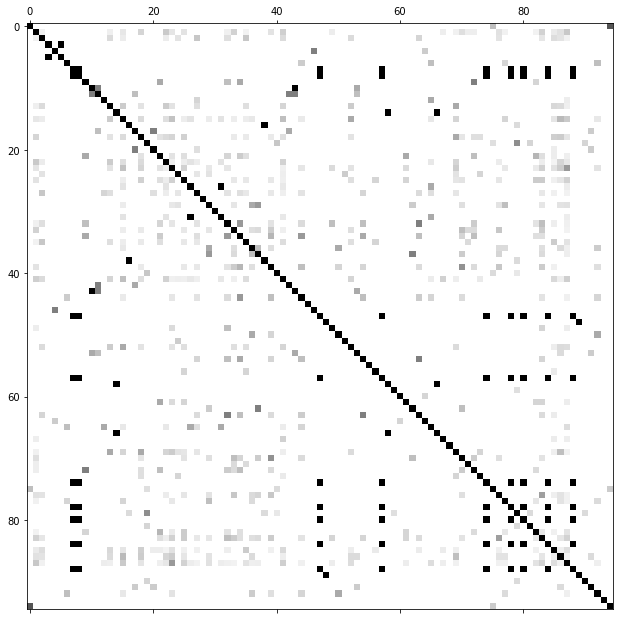

In [76]:
# visualize the matrix
plt.matshow(jaccard, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

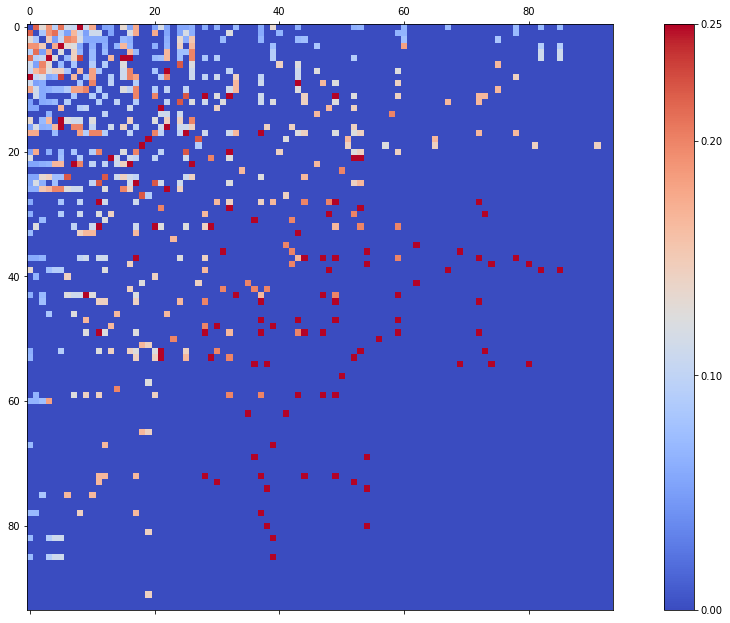

In [77]:
popular_indexing = mostRatedRestaurant[:]
jaccard_sorted = jaccard[:,popular_indexing]
jaccard_sorted_total = jaccard_sorted[popular_indexing, :]

# Remove ones:
jaccard_sorted_total[jaccard_sorted_total == 1.0] = 0.0
cax = plt.matshow(jaccard_sorted_total, fignum=1000, cmap=plt.cm.coolwarm)
plt.gcf().colorbar(cax, ticks=[0, 0.1, 0.2, 0.25])
plt.clim(0, 0.25)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [78]:
Ntop = 5
# Calculate the predictoins with Jaccard
predictions = trainUsersGrouped['placeID'].apply(lambda x: co_occurrance_recommendation(x, jaccard, Ntop))
predictions.head()

0     [13.0, 18.0, 86.0, 87.0, 1.0]
1    [23.0, 52.0, 86.0, 70.0, 15.0]
2    [39.0, 70.0, 83.0, 76.0, 34.0]
3    [32.0, 63.0, 54.0, 34.0, 49.0]
4     [69.0, 2.0, 35.0, 51.0, 86.0]
Name: placeID, dtype: object

In [79]:
testUsersGrouped.values[:3, 1]

array([list([27, 31]), list([12, 15, 65]), list([86, 26])], dtype=object)

In [80]:
predictions[:3]

0     [13.0, 18.0, 86.0, 87.0, 1.0]
1    [23.0, 52.0, 86.0, 70.0, 15.0]
2    [39.0, 70.0, 83.0, 76.0, 34.0]
Name: placeID, dtype: object

In [81]:
for (seen, recom) in zip(testUsersGrouped.values[:3, 1], predictions[:3]):
    print("*"*6)
    print("Seen items: ")
    print([i for i in seen])
    print("Recommended items: ")
    print([i for i in recom])

******
Seen items: 
[27, 31]
Recommended items: 
[13.0, 18.0, 86.0, 87.0, 1.0]
******
Seen items: 
[12, 15, 65]
Recommended items: 
[23.0, 52.0, 86.0, 70.0, 15.0]
******
Seen items: 
[86, 26]
Recommended items: 
[39.0, 70.0, 83.0, 76.0, 34.0]


In [82]:
for k in [3,5,10,30,50,100]:
    print('----------')
    evaluate_recall(k, trainUsersGrouped, testUsersGrouped, jaccard, mostRatedRestaurant[:]);

----------
Co-occurance model: recall@3=0.325
Co-occurance User model: recall@3=0.238
Popularity model: recall@3=0.052
----------
Co-occurance model: recall@5=0.351
Co-occurance User model: recall@5=0.239
Popularity model: recall@5=0.091
----------
Co-occurance model: recall@10=0.262
Co-occurance User model: recall@10=0.203
Popularity model: recall@10=0.170
----------
Co-occurance model: recall@30=0.124
Co-occurance User model: recall@30=0.110
Popularity model: recall@30=0.500
----------
Co-occurance model: recall@50=0.074
Co-occurance User model: recall@50=0.070
Popularity model: recall@50=0.599
----------
Co-occurance model: recall@100=0.040
Co-occurance User model: recall@100=0.042
Popularity model: recall@100=0.941


# Memory-Based Collaborative Filtering (CF)

In [83]:
train.head()

,userID,placeID,rating,food_rating,service_rating
33,23,66,0,0,0
471,37,30,1,1,2
766,6,1,1,1,1
54,26,89,2,2,2
550,78,27,2,1,2


In [84]:
train.values[:,0:3]

array([[ 23,  66,   0],
       [ 37,  30,   1],
       [  6,   1,   1],
       ...,
       [ 27,  18,   1],
       [ 26,  48,   2],
       [112,   9,   0]])

In [86]:
n_users = len(userProfile_r['userID'].unique())
uMatrixTraining = np.zeros((n_users, n_items)) # utility matrix
for row in train.values[:,0:3]:
    user = row[0]-1
    item = row[1]
    rating = row[2]
    uMatrixTraining[user, item] = rating

In [151]:
n_users

138

In [154]:
for row in train.values[:,0:3]:
    print(row)

[23 66  0]
[37 30  1]
[6 1 1]
[26 89  2]
[78 27  2]
[86 87  2]
[78 35  2]
[106  25   2]
[135  18   0]
[73 52  0]
[116  23   1]
[92 51  1]
[97 32  2]
[96 63  1]
[82  4  0]
[98 57  1]
[67 46  1]
[127  40   2]
[106  23   2]
[96 39  1]
[18 22  1]
[109  85   2]
[59 23  2]
[ 6 23  1]
[59 86  1]
[32 82  2]
[119  40   0]
[35 90  1]
[15 30  2]
[133  79   2]
[91  6  1]
[ 8 91  1]
[ 7 87  1]
[117  38   1]
[88 51  0]
[83 39  1]
[15 20  1]
[88 85  2]
[111  17   2]
[ 4 32  2]
[92 87  0]
[61 82  1]
[98 87  1]
[97 72  2]
[100  19   2]
[61 29  1]
[80 14  1]
[71 69  2]
[41 40  2]
[75 52  1]
[33 29  2]
[105   8   0]
[70 28  2]
[34 50  1]
[89  6  1]
[79 79  2]
[40 59  1]
[132  41   2]
[ 8 20  1]
[34 36  0]
[13 35  1]
[71 13  2]
[18 85  1]
[108  82   1]
[99 18  1]
[80 28  2]
[102  43   2]
[89 52  1]
[32 85  0]
[28 64  1]
[29 52  0]
[89 61  1]
[90 87  2]
[101  85   2]
[16 13  2]
[48 39  2]
[26 60  0]
[92 39  1]
[35 59  2]
[91 50  1]
[20 93  2]
[49 77  0]
[ 7 62  1]
[89 44  1]
[85 18  0]
[120  85   1]
[104  

In [87]:
uMatrixTesting = np.zeros((n_users, n_items)) # utility matrix
for row in test.values[:,0:3]:
    # Note user ids start at 1
    user = row[0]-1
    item = row[1]
    rating = row[2]
    uMatrixTesting[user, item] = rating

In [88]:
def cosineSimilarity(ratings, kind='user', epsilon=1e-9):
    """
    Calculate the cosine distance along the row (columns) of a matrix for users (items)
    
    :param ratings: a n_user X n_items matrix
    :param kind: string indicating whether we are in mode 'user' or 'item'
    :param epsilon: a small value to avoid dividing by zero (optional, defaults to 1e-9)
    
    :return a square matrix with the similarities
    """
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T)+epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings)+epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return sim / norms / norms.T

In [89]:
cosineSimilarity(uMatrixTraining, 'item')

array([[1.00000000e+00, 4.10304970e-11, 7.10669054e-11, ...,
        8.33333333e-11, 1.36082763e-10, 8.01783726e-01],
       [4.10304970e-11, 1.00000000e+00, 1.83702358e-01, ...,
        3.07728727e-11, 5.02518908e-11, 3.28975847e-11],
       [7.10669054e-11, 1.83702358e-01, 1.00000000e+00, ...,
        5.33001791e-11, 8.70388280e-11, 5.69802882e-11],
       ...,
       [8.33333333e-11, 3.07728727e-11, 5.33001791e-11, ...,
        1.00000000e+00, 1.02062073e-10, 6.68153105e-11],
       [1.36082763e-10, 5.02518908e-11, 8.70388280e-11, ...,
        1.02062073e-10, 1.00000000e+00, 1.09108945e-10],
       [8.01783726e-01, 3.28975847e-11, 5.69802882e-11, ...,
        6.68153105e-11, 1.09108945e-10, 1.00000000e+00]])

In [90]:
# we use cosine similarity
userSimilarity = cosineSimilarity(uMatrixTraining, kind='user')

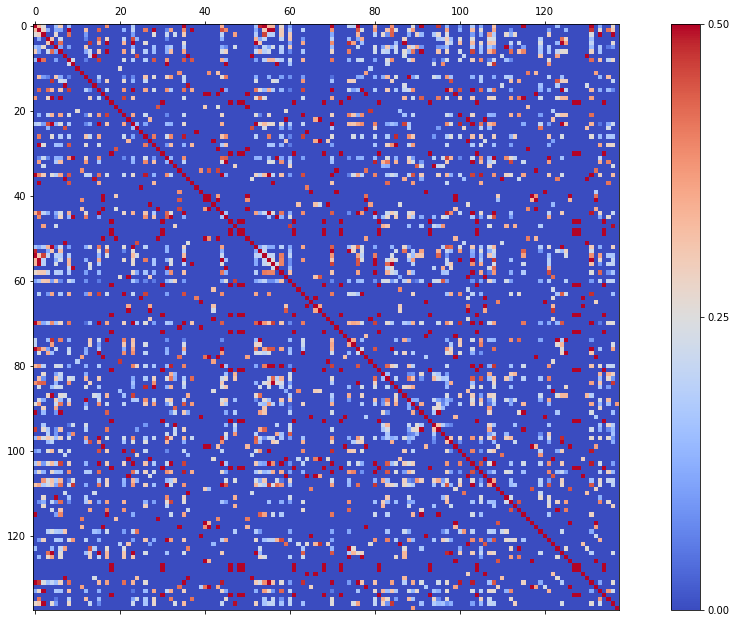

In [91]:
cax = plt.matshow(userSimilarity, fignum=1000, cmap=plt.cm.coolwarm)
plt.gcf().colorbar(cax, ticks=[0, 0.25, 0.5])
plt.clim(0, 0.5)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [92]:
np.mean(userSimilarity), np.std(userSimilarity)

(0.06219037860487107, 0.17221849419382063)

In [93]:
print(userSimilarity.shape, uMatrixTraining.shape)

(138, 138) (138, 95)


In [94]:
norm = np.array([userSimilarity.sum(axis=1)]).T

In [95]:
userItemCFpredictions = userSimilarity.dot(uMatrixTraining) / norm

In [96]:
# Be careful: take a look at the values
np.max(userItemCFpredictions), np.min(userItemCFpredictions), np.mean(userItemCFpredictions), np.std(userItemCFpredictions)

(1.871852954955417, 0.0, 0.0692485038150534, 0.17557814106671807)

In [174]:
sum_ = uMatrixTraining.sum(axis=1)
print(sum_)
len_ =np.count_nonzero(uMatrixTraining, axis=1)
len__=np.zeros(len(len_))
for i in range(len(len_)):
    len__[i]=float(len_[i])
    if len_[i]==0:
        len__[i]=0.5
print(len__)
average_ratings = np.tile(sum_// len_, n_items).reshape([n_items, n_users]).T

[ 5. 10. 14.  9.  6. 12.  5.  6. 12.  1.  3.  6.  9.  4.  4. 17.  1.  3.
  0.  3.  6.  8.  2. 12.  7.  4.  6.  5.  7.  1.  0.  9.  9.  3.  5. 13.
  7.  2.  1.  3.  5.  5.  5.  7.  9.  6.  0.  9.  0.  0.  3.  4. 10.  9.
 12.  8.  4.  3. 13.  3. 23.  0.  2.  5.  4.  3.  6.  4.  0.  3. 22.  2.
  0.  2.  7.  6.  3.  9.  6.  4.  4.  0. 10. 12.  6. 10.  9.  6. 10. 15.
  5.  5.  6.  0. 12.  6. 14. 15.  7.  6.  9.  8.  8.  9.  0. 17.  4. 10.
 10.  3.  7.  2.  6.  2.  4.  3.  2.  2.  6.  5.  4. 14.  8.  5.  3.  6.
  2.  0.  0.  1.  6.  6.  6. 17.  0. 13. 12.  1.]
[ 3.   7.   7.   5.   4.   9.   5.   6.   8.   1.   2.   3.   6.   4.
  3.   9.   1.   3.   0.5  2.   3.   5.   1.  11.   4.   2.   6.   3.
  6.   1.   0.5  7.   5.   3.   3.   7.   5.   1.   1.   3.   3.   3.
  5.   4.   6.   4.   0.5  5.   0.5  0.5  3.   3.   6.   5.   6.   4.
  4.   2.   7.   2.  15.   0.5  2.   4.   3.   2.   5.   4.   0.5  2.
 12.   1.   0.5  1.   5.   3.   2.   5.   4.   3.   4.   0.5  6.   7.
  3.   6.   7.   3.

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in floor_divide
  # Remove the CWD from sys.path while we load stuff.


In [175]:
np.count_nonzero(uMatrixTraining[18,:])

0

In [176]:
average_ratings[18]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [177]:
uMatrixTraining_shifted = uMatrixTraining - np.multiply(average_ratings, uMatrixTraining)

In [178]:
uMatrixTraining[18] - np.multiply(average_ratings, uMatrixTraining)

array([[ 0., -2.,  0., ...,  0.,  0.,  0.],
       [ 0., -2., -1., ...,  0.,  0.,  0.],
       [ 0., -4.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0., -4.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [179]:
userItemCFpredictions_corrected = average_ratings + userSimilarity.dot(uMatrixTraining_shifted) / norm

In [180]:
# Now rating values are more reasonable
np.max(userItemCFpredictions_corrected), np.min(userItemCFpredictions_corrected), np.mean(userItemCFpredictions_corrected), np.std(userItemCFpredictions_corrected)

/home/javier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(nan, nan, nan, nan)

In [181]:
userSimilarity.dot(uMatrixTraining_shifted)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [182]:
for i in range(138):
    print(i)
    print(uMatrixTraining_shifted[i])

0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[ 0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.
  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.
  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
3
[0. 0. 0. 0. 0. 0. 0. 0. 

  0.  0.  0.  0.  0.]
115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
117
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]

In [183]:
userSimilarity.shape

(138, 138)